In [1]:
import pingouin as pg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d

C:\Users\max_6\Anaconda3\envs\detect\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.4, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
C:\Users\max_6\Anaconda3\envs\detect\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
data = pd.read_csv('../ressources/icc-repeat.csv')
#data = pd.read_csv('../ressources/icc.csv')
data

,Subjects,sess1,sess2,sess3,sess4,sess5
0,070618-601,0.206488,0.213134,0.228296,0.212685,0.225239
1,131217-701,0.206903,0.198113,0.177695,0.182313,0.197771
2,180518-601,0.176599,0.184355,0.181086,0.177948,0.175228
3,210516-601,0.168945,0.155276,0.157181,0.160944,0.163268
4,231017-301,0.168979,0.180631,0.160877,0.175833,0.161994
5,310118-701,0.190226,0.192958,0.206218,0.192008,0.198881


In [3]:
data_melt = pd.melt(data, id_vars=['Subjects'], value_vars=['sess1', 'sess2', 'sess3', 'sess4', 'sess5'])
data_melt

,Subjects,variable,value
0,070618-601,sess1,0.206488
1,131217-701,sess1,0.206903
2,180518-601,sess1,0.176599
3,210516-601,sess1,0.168945
4,231017-301,sess1,0.168979
5,310118-701,sess1,0.190226
6,070618-601,sess2,0.213134
7,131217-701,sess2,0.198113
8,180518-601,sess2,0.184355
9,210516-601,sess2,0.155276


In [4]:
icc = pg.intraclass_corr(data=data_melt, targets='Subjects', raters='variable',
                         ratings='value').round(3)
icc.set_index("Type")

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.859,31.438,5,24,0.0,"[0.64, 0.98]"
ICC2,Single random raters,0.858,27.187,5,20,0.0,"[0.63, 0.98]"
ICC3,Single fixed raters,0.840,27.187,5,20,0.0,"[0.59, 0.97]"
ICC1k,Average raters absolute,0.968,31.438,5,24,0.0,"[0.9, 0.99]"
ICC2k,Average random raters,0.968,27.187,5,20,0.0,"[0.9, 0.99]"
ICC3k,Average fixed raters,0.963,27.187,5,20,0.0,"[0.88, 0.99]"


In [5]:
data_copy = data.drop(['Subjects'], axis=1)
data_copy.columns = ['1', '2', '3', '4', '5']

In [6]:
#data_copy.index += 1 
#data_copy.sort_values('5', inplace=True)
data_copy.reset_index(drop=True, inplace=True)
data_copy.index = np.arange(1, len(data_copy) + 1)
data_copy

,1,2,3,4,5
1,0.206488,0.213134,0.228296,0.212685,0.225239
2,0.206903,0.198113,0.177695,0.182313,0.197771
3,0.176599,0.184355,0.181086,0.177948,0.175228
4,0.168945,0.155276,0.157181,0.160944,0.163268
5,0.168979,0.180631,0.160877,0.175833,0.161994
6,0.190226,0.192958,0.206218,0.192008,0.198881


In [53]:
std = data_copy.std(axis=0)
mean = data_copy.mean(axis=1)
cov = np.mean(std/mean)
print("COV: ",cov," stdev: ", np.mean(std))

COV:  nan  stdev:  0.021311316881096852


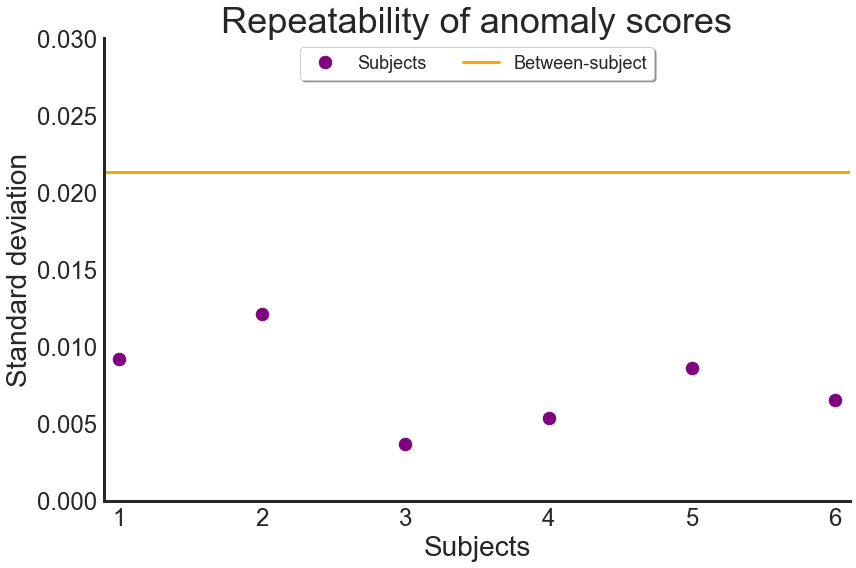

In [57]:
sns.set_style("white")
fig, ax = plt.subplots(1,1,figsize=(12, 8))
data_copy.std(axis=1).plot(ax=ax, lw=3, style='.', ms=25, color="purple", label="Subjects")
ax.axhline(np.mean(std), color="orange", label="Between-subject", lw="3")
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
sns.despine()
ax.legend(loc='upper center',fontsize=18, title_fontsize=18, fancybox=True, shadow=True, ncol=2) 
ax.set_xlabel("Subjects",size=28)
ax.set_ylabel("Standard deviation",size=28)
ax.tick_params(axis='y',labelsize=24)
ax.tick_params(axis='x',labelsize=24)
ax.set_title("Repeatability of anomaly scores", size=36)
ax.set_ylim(0,0.03)
ax.set_xlim(0.9,6.1)
fig.tight_layout()
fig.savefig('repeat.png', dpi=200)

In [4]:
# PLOTS

In [5]:
df = pd.read_csv('../ressources/rish0_mean_ICC3K_upd.csv')

In [6]:
df

,Var1,AF_left_01,AF_left_02,AF_left_03,AF_left_04,AF_left_05,AF_left_06,AF_left_07,AF_left_08,AF_left_09,...,UF_right_11,UF_right_12,UF_right_13,UF_right_14,UF_right_15,UF_right_16,UF_right_17,UF_right_18,UF_right_19,UF_right_20
0,ICC3K: RISH0 mean,0.868479,0.786095,0.517393,0.657861,0.731952,0.893016,0.871426,0.878023,0.717599,...,0.915244,0.817530,0.932600,0.969113,0.947396,0.933114,0.930557,0.943175,0.913007,0.884446
1,95% CI lower: RISH0 mean,0.586951,0.330210,-0.497463,-0.066512,0.162288,0.663710,0.596163,0.616792,0.117877,...,0.733367,0.427997,0.787831,0.902639,0.834317,0.789445,0.781415,0.821052,0.726350,0.636884
2,95% CI upper: RISH0 mean,0.979013,0.965828,0.922618,0.945244,0.957146,0.982934,0.979484,0.980539,0.954842,...,0.986484,0.970862,0.989255,0.995078,0.991615,0.989337,0.988928,0.990942,0.986127,0.981565
3,CV: RISH0 mean,0.061319,0.061141,0.048641,0.038598,0.031369,0.023733,0.022090,0.020076,0.022606,...,0.033649,0.025110,0.027981,0.023927,0.026736,0.027741,0.033391,0.034095,0.052470,0.071458


In [7]:
bundles = ['AF_L', 'AF_R', 'ATR_L', 'ATR_R', 'CC_1', 'CC_2', 'CC_6', 'CC_7', 'CG_L', 'CG_R', 'CST_L', 'CST_R', 'IFO_L', 'IFO_R', 'ILF_L', 'ILF_R', 'OR_L', 'OR_R', 
           'SLF_I_L',  'SLF_I_R', 'SLF_II_L', 'SLF_II_R', 'SLF_III_L', 'SLF_III_R', 'UF_L', 'UF_R'] 

In [8]:
AF_L = df.loc[: , "AF_left_01":"AF_left_20"]
AF_R = df.loc[: , "AF_right_01":"AF_right_20"]
ATR_L = df.loc[: , "ATR_left_01":"ATR_left_20"]
ATR_R = df.loc[: , "ATR_right_01":"ATR_right_20"]
CC_1 = df.loc[: , "CC_1_01":"CC_1_20"]
CC_2 = df.loc[: , "CC_2_01":"CC_2_20"]
CC_6 = df.loc[: , "CC_6_01":"CC_7_20"]
CC_7 = df.loc[: , "CC_7_01":"CC_7_20"]
CG_L = df.loc[: , "CG_left_01":"CG_left_20"]
CG_R = df.loc[: , "CG_right_01":"CG_right_20"]
CST_L = df.loc[: , "CST_left_01":"CST_left_20"]
CST_R = df.loc[: , "CST_right_01":"CST_right_20"]
IFO_L = df.loc[: , "IFO_left_01":"IFO_left_20"]
IFO_R = df.loc[: , "IFO_right_01":"IFO_right_20"]
ILF_L = df.loc[: , "ILF_left_01":"ILF_left_20"]
ILF_R = df.loc[: , "ILF_right_01":"ILF_right_20"]
OR_L = df.loc[: , "OR_left_01":"OR_left_20"]
OR_R = df.loc[: , "OR_right_01":"OR_right_20"]
SLF_I_L = df.loc[: , "SLF_I_left_01":"SLF_I_left_20"]
SLF_I_R = df.loc[: , "SLF_I_right_01":"SLF_I_right_20"]
SLF_II_L = df.loc[: , "SLF_II_left_01":"SLF_II_left_20"]
SLF_II_R = df.loc[: , "SLF_II_right_01":"SLF_II_right_20"]
SLF_III_L = df.loc[: , "SLF_III_left_01":"SLF_III_left_20"]
SLF_III_R = df.loc[: , "SLF_III_right_01":"SLF_III_right_20"]
UF_L = df.loc[: , "UF_left_01":"UF_left_20"]
UF_R = df.loc[: , "UF_right_01":"UF_right_20"]

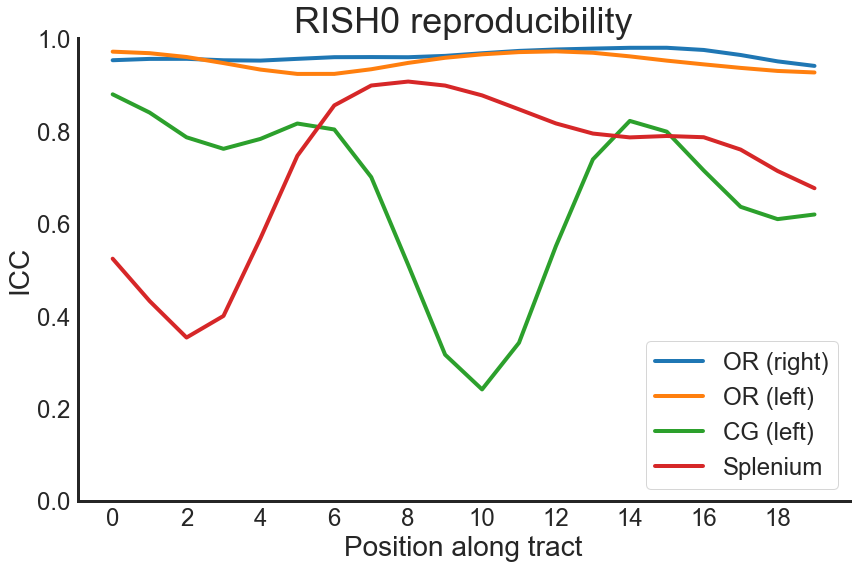

In [9]:

sigma=1.5
sns.set_style("white")
fig, ax = plt.subplots(1,1,figsize=(12, 8))
ax.set_ylim(0,1)
ax.set_xlabel("Position along tract",size=28)
ax.set_ylabel("ICC",size=28)
ax.tick_params(axis='y',labelsize=24)
ax.tick_params(axis='x',labelsize=24)

ax.set_title("RISH0 reproducibility", size=36)

ax.plot(gaussian_filter1d(OR_R.loc[0].values,sigma=sigma), label="OR (right)", linewidth=4)
ax.plot(gaussian_filter1d(OR_L.loc[0].values,sigma=sigma), label="OR (left)", linewidth=4)

ax.plot(gaussian_filter1d(CG_L.loc[0].values,sigma=sigma), label="CG (left)", linewidth=4)
ax.plot(gaussian_filter1d(CC_7.loc[0].values,sigma=sigma), label="Splenium", linewidth=4)

ax.set_xticks(range(0, 20, 2))
ax.set_xticklabels(np.arange(0, 20, 2))
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
sns.despine()
ax.legend(loc='lower right',fontsize=24)  

fig.tight_layout()
fig.savefig('profile-icc.png', dpi=200)


In [10]:
ICC_df = pd.DataFrame(columns=bundles)

In [11]:
ICC_df["AF_L"] = AF_L.mean(axis=1)
ICC_df["AF_R"] = AF_R.mean(axis=1)
ICC_df["ATR_L"] = ATR_L.mean(axis=1)
ICC_df["ATR_R"] = ATR_R.mean(axis=1)
ICC_df["CC_1"] = CC_1.mean(axis=1)
ICC_df["CC_2"] = CC_2.mean(axis=1)
ICC_df["CC_6"] = CC_6.mean(axis=1)
ICC_df["CC_7"] = CC_7.mean(axis=1)
ICC_df["CG_L"] = CG_L.mean(axis=1)
ICC_df["CG_R"] = CG_R.mean(axis=1)
ICC_df["CST_L"] = CST_L.mean(axis=1)
ICC_df["CST_R"] = CST_R.mean(axis=1)
ICC_df["IFO_L"] = IFO_L.mean(axis=1)
ICC_df["IFO_R"] = IFO_R.mean(axis=1)
ICC_df["ILF_L"] = ILF_L.mean(axis=1)
ICC_df["ILF_R"] = ILF_R.mean(axis=1)
ICC_df["OR_L"] = OR_L.mean(axis=1)
ICC_df["OR_R"] = OR_R.mean(axis=1)
ICC_df["SLF_I_L"] = SLF_I_L.mean(axis=1)
ICC_df["SLF_I_R"] = SLF_I_R.mean(axis=1)
ICC_df["SLF_II_L"] = SLF_II_L.mean(axis=1)
ICC_df["SLF_II_R"] = SLF_II_R.mean(axis=1)
ICC_df["SLF_III_L"] = SLF_III_L.mean(axis=1)
ICC_df["SLF_III_R"] = SLF_III_R.mean(axis=1)
ICC_df["UF_L"] = UF_L.mean(axis=1)
ICC_df["UF_R"] = UF_R.mean(axis=1)

In [16]:
OR_R.loc[3].mean(axis=0)

0.025778487062497198

In [14]:
sortedVals = ICC_df.sort_values(by=0, ascending=False, axis=1)
test = sortedVals.mean(axis=1)
test

0    0.862901
1    0.569874
2    0.978092
3    0.033960
dtype: float64

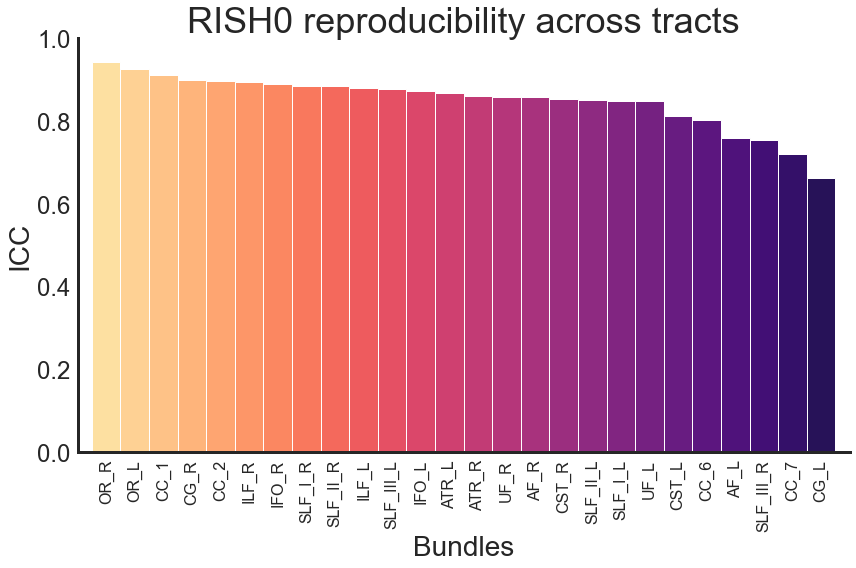

In [38]:
#plot = nb
import matplotlib.cm as cm
import seaborn as sns
sns.set_style("white")
from matplotlib.colors import Normalize
my_cmap = cm.get_cmap('magma_r')
my_norm = Normalize(vmin=0, vmax=len(bundles)+6)
fig, ax = plt.subplots(1,1,figsize=(12, 8))
ax.set_xlim(-1,len(bundles))
ax.set_ylim(0,1)
ax.set_xlabel("Bundles",size=28)
ax.set_ylabel("ICC",size=28)
ax.tick_params(axis='y',labelsize=24)
ax.tick_params(axis='x',labelsize=16)
ax.set_xticks(np.arange(0, len(bundles), 1))
ax.set_title("RISH0 reproducibility across tracts", size=36)
ax.set_xticklabels(sortedVals, rotation=90)
ax.bar(np.arange(0,len(bundles)),sortedVals.loc[0].values, color=my_cmap(my_norm(np.arange(2,len(bundles)+2))), alpha=1, edgecolor="white", width=1.0)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
sns.despine()


fig.tight_layout()
fig.savefig('ICC-bar.png', dpi=200)